In [12]:
from Shared_Tool.Image_Load_IAM import IAM_Img_Handler
from OCR_classifiers.HOG_SVM.HOG_SVM import classifier_HOG_SVM

In [13]:
num_img = 1000
IAM_handler = IAM_Img_Handler()
X, y = IAM_handler.load_imgs(1000)

D:\Projects\OCR\Shared_Tool\Image_Load_IAM.py:29: ConversionWarning: Some errors were detected !
    Line #23 (got 10 columns instead of 9)
    Line #48 (got 10 columns instead of 9)
    Line #75 (got 10 columns instead of 9)
    Line #100 (got 10 columns instead of 9)
    Line #118 (got 10 columns instead of 9)
    Line #136 (got 10 columns instead of 9)
    Line #199 (got 10 columns instead of 9)
    Line #218 (got 10 columns instead of 9)
    Line #279 (got 10 columns instead of 9)
    Line #297 (got 10 columns instead of 9)
    Line #365 (got 8 columns instead of 9)
    Line #493 (got 8 columns instead of 9)
    Line #1427 (got 10 columns instead of 9)
    Line #1512 (got 10 columns instead of 9)
    Line #1598 (got 10 columns instead of 9)
    Line #1930 (got 8 columns instead of 9)
    Line #2324 (got 8 columns instead of 9)
    Line #2720 (got 8 columns instead of 9)
    Line #3028 (got 8 columns instead of 9)
    Line #3331 (got 10 columns instead of 9)
    Line #3395 (got 10 c

Data loaded and deleted data with 'err' flag, the size of valid data is  96365


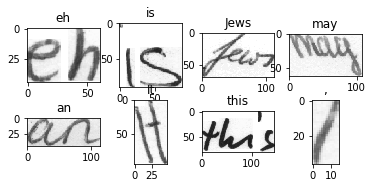

In [14]:
IAM_handler.show_8_pic()

In [18]:
model_SVM = classifier_HOG_SVM(imgs=X, meta=y, num_train=800, num_val=200)

IndexError: index 800 is out of bounds for axis 0 with size 800